# MNIST 튜토리얼

In [5]:
# 라이브러리 호출
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dataset
import torchvision.transforms as transforms

import random
import numpy as np
import matplotlib.pyplot as plt

In [6]:
mnist_train = dataset.MNIST(root='./MNIST_data', #학습데이터셋
                          train=True, #학습여부
                          transform=transforms.ToTensor(), #자료형태 Tensor
                          download=True) #이미지가 없으면 자동 다운 

mnist_test = dataset.MNIST(root='./MNIST_data', #테스트 데이터 셋
                         train=False, 
                         transform=transforms.ToTensor(), 
                         download=True)

In [7]:
print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./MNIST_data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./MNIST_data
    Split: Test
    StandardTransform
Transform: ToTensor()


5


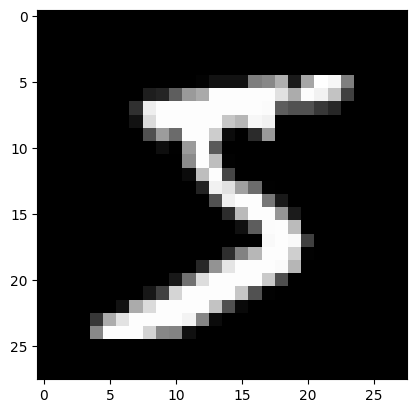

In [8]:
# sample
img, label = mnist_train[0] #mnist_train는 입력 데이터 레이블로 구성
plt.imshow(img[0,:,:],cmap='gray')
print(label)

In [9]:
# 상대적으로 쉬운 문제이므로 valid_dataset은 따로 상정X
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=32,shuffle=True,drop_last=False)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=32,shuffle=False,drop_last=False)

In [11]:
# Neural network 모델만들기
class MNIST_full(nn.Module): # 인공 신경망 호출
    def __init__(self): # 상속받은 파이썬 클래쓰의 초기 구문
        super(MNIST_full,self).__init__()
        self.lin1 = nn.Linear(784,256) #뉴런 생성
        self.lin2 = nn.Linear(256,128)
        self.lin3 = nn.Linear(128,10)

    def forward(self,x):
        x = x.view(-1,784)
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        x = F.softmax(self.lin3(x),dim=1)
        return x

In [13]:
model = MNIST_full() #인공신경망 생성함수 호출
optimizer = optim.Adam(model.parameters(),lr=0.001) #최적화 도구로 adam 알고리즘을 사용하여 최적화 대상은 모델의 매개변수가 된다 학습률은 0.01

In [14]:
criterion = nn.CrossEntropyLoss() #교차 엔트로피 함수를 목적함수로 

CrossEntropyLoss()


In [15]:
# 손실 값과 정확도를 저장할 리스트 초기화
loss_buffer, acc = [], []

# 테스트 데이터 로더에서 배치 단위로 데이터를 가져옴
for x, y in test_loader:
    # 타겟 레이블을 원-핫 인코딩으로 변환
    y_onehot = torch.zeros((len(y), 10))  # 10개의 클래스가 있다고 가정
    y_onehot[range(len(y)), y] = 1  # 각 배치의 레이블을 원-핫 벡터로 변환

    # 모델을 사용하여 예측값 계산
    y_infer = model(x)

    # 손실 함수 계산
    loss = criterion(y_infer, y)  # 손실 함수는 보통 CrossEntropyLoss 등이 사용됨
    loss_buffer.append(loss.item())  # 손실 값을 리스트에 추가

    # 예측값에서 가장 높은 값을 가진 클래스 인덱스를 선택
    correct_prediction = torch.argmax(y_infer, 1) == y  # 예측값과 실제값 비교
    acc.append(correct_prediction.float().mean())  # 정확도를 리스트에 추가
    
# 평균 손실 값과 정확도 계산 및 출력
print(f'Test loss {np.mean(loss_buffer):f}, Accuracy: {np.mean(acc) * 100:f}%')


Test loss 2.302738, Accuracy: 5.251598%


실제 이미지의 숫자 1
예측 이미지의 숫자 tensor([6])


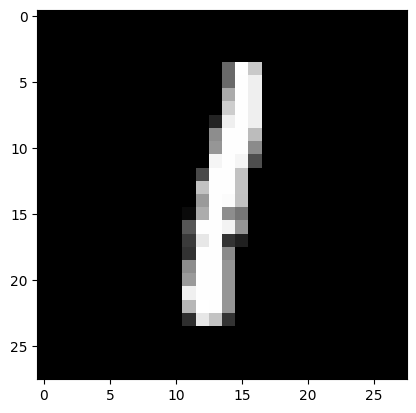

In [26]:
# 실물샘플
img,label=random.choice(mnist_test)
plt.imshow(img[0,:,:],cmap='gray')
y_infer = model(img)
print(f'실제 이미지의 숫자 {label}')
print(f'예측 이미지의 숫자 {torch.argmax(y_infer,1)}')